In [31]:
import numpy
import tensorflow as tf
import pandas
pandas.set_option('display.precision',10)
from tensorflow.keras import layers
##from tf.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [32]:
# load dataset
df = pandas.read_csv("datasets - Million Live_v2.csv")
df.head()

,game,ranking_idol,event_type,year,month,duration,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff
0,mltd,amami haruka,anniv,2018,6,14,1156358,136437,123212,NaN,NaN,NaN
1,mltd,kisaragi chihaya,anniv,2018,6,14,1193282,167612,157201,NaN,NaN,NaN
2,mltd,hoshi miki,anniv,2018,6,14,1363781,172457,164464,NaN,NaN,NaN
3,mltd,hagiwara yukiho,anniv,2018,6,14,963271,116070,100014,NaN,NaN,NaN
4,mltd,takatsuki yayoi,anniv,2018,6,14,919576,100530,86908,NaN,NaN,NaN


In [33]:
#One hot encoding
#Encode game
game = df['game']
game_dummy = pandas.get_dummies(game,prefix='game')
game_dummy.head()

,game_mltd
0,1
1,1
2,1
3,1
4,1


In [34]:
#Encode Idols
idol = df['ranking_idol']
idol_dummy = pandas.get_dummies(idol,prefix='idol')
idol_dummy.head()

,idol_akizuki ritsuko,idol_amami haruka,idol_emily stewart,idol_fukuda noriko,idol_futami ami,idol_futami mami,idol_ganaha hibiki,idol_hagiwara yukiho,idol_hakozaki serika,idol_handa roco,...,idol_suou momoko,idol_takatsuki yayoi,idol_takayama sayoko,idol_tanaka kotoha,idol_tenkubashi tomoka,idol_tokoro megumi,idol_tokugawa matsuri,idol_toyokawa fuuka,idol_yabuki kana,idol_yokoyama nao
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [35]:
#Encode Event Types
event_type = df['event_type']
event_type_dummy = pandas.get_dummies(event_type,prefix='event_type')
event_type_dummy.head()

,event_type_anniv,event_type_theater,event_type_tour
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [36]:
#Drop Data
df.drop(['game'],axis=1,inplace=True)
df.drop(['ranking_idol'],axis=1,inplace=True)
df.drop(['event_type'],axis=1,inplace=True)
df.head()

,year,month,duration,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff
0,2018,6,14,1156358,136437,123212,NaN,NaN,NaN
1,2018,6,14,1193282,167612,157201,NaN,NaN,NaN
2,2018,6,14,1363781,172457,164464,NaN,NaN,NaN
3,2018,6,14,963271,116070,100014,NaN,NaN,NaN
4,2018,6,14,919576,100530,86908,NaN,NaN,NaN


In [37]:
#Concat Data
df = pandas.concat([game_dummy,idol_dummy,event_type_dummy,df],axis=1)
df.head()

,game_mltd,idol_akizuki ritsuko,idol_amami haruka,idol_emily stewart,idol_fukuda noriko,idol_futami ami,idol_futami mami,idol_ganaha hibiki,idol_hagiwara yukiho,idol_hakozaki serika,...,event_type_tour,year,month,duration,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff
0,1,0,1,0,0,0,0,0,0,0,...,0,2018,6,14,1156358,136437,123212,NaN,NaN,NaN
1,1,0,0,0,0,0,0,0,0,0,...,0,2018,6,14,1193282,167612,157201,NaN,NaN,NaN
2,1,0,0,0,0,0,0,0,0,0,...,0,2018,6,14,1363781,172457,164464,NaN,NaN,NaN
3,1,0,0,0,0,0,0,0,1,0,...,0,2018,6,14,963271,116070,100014,NaN,NaN,NaN
4,1,0,0,0,0,0,0,0,0,0,...,0,2018,6,14,919576,100530,86908,NaN,NaN,NaN


In [38]:
df.shape

(90, 65)

In [142]:
#Zscoring
df['t1_zscore'] = (df['t1_cutoff'] - df['t1_cutoff'].mean())/df['t1_cutoff'].std()
df['t2_zscore'] = (df['t2_cutoff'] - df['t2_cutoff'].mean())/df['t2_cutoff'].std()   
df['t3_zscore'] = (df['t3_cutoff'] - df['t3_cutoff'].mean())/df['t3_cutoff'].std()
t1_std = df['t1_cutoff'].std()
t1_mean =  df['t1_cutoff'].mean()
df.head()
df.shape

(90, 68)

In [140]:
# #Split data
# # split into input (X) and output (Y) variables
# dataset = df.values
# X = dataset[:,0:59]
# Y_t1 = dataset[:,65]
# Y_t2 = dataset[:,66]
# Y_t3 = dataset[:,67]
# X_train = dataset[:65,0:59]
# X_test = dataset[65:,0:59]
# Y_train_t1 = dataset[:65,65]
# Y_test_t1 = dataset[65:,65]
# Y_train_t2 = dataset[:66,66]
# Y_test_t2 = dataset[66:,66]
# Y_train_t3 = dataset[:67,67]
# Y_test_t3 = dataset[67:,67]

# Split data
# split into input (X) and output (Y) variables
dataset = df.values
X = dataset[:,0:59]
Y = dataset[:,65:68]
X_all = dataset[:,0:59]
Y_all = dataset[:,65:68]
X_train = dataset[:65,0:59]
X_test = dataset[65:,0:59]
Y_train = dataset[:65,65:68]
Y_test = dataset[65:,65:68]

In [97]:
#Predict
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [133]:
epoch = 500
batch = 10
def final_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=59, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal'))
    model.add (Dense(1,kernel_initializer='normal'))
    model.add(Dense(3, activation='linear'))
    
    model.compile(loss='mean_absolute_error', optimizer='rmsprop')    
    return model

In [134]:
#fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=final_model(), epochs=epoch, batch_size=batch, verbose=0)

In [135]:
model = final_model()
model.fit(X_train, Y_train, epochs=epoch,batch_size=batch,verbose=0)
#1k/10 : -0.28/0.12
#2k/10 : -0.34/0.15 but visually better,maybe need to change to MSE (?)
#1k/5 : -0.34/0.15 visually worse than ^
#2k/5 : -0.29/0.12 visually better than all of the above
#2k/5,59/1/1 : -0.27/0.09 visually slightly better than all of the above
#500/5,59 : -0.25/0.12 visually same
#3k/5 : -0.23/0.11 some are better, some worse (most likely overfit)
#500/5, 3 layer : 0.77/0.23 good for tier 2 tier 3. Next step focus on tier 1 and 2
#1500/5, 3 layer: 0.8/0.26 good for t1.

In [136]:
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=final_model, epochs=epoch, batch_size=batch, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X_train, Y_train, cv=kfold)
print("Final: %.2f (%.2f) MAE" % (results.mean(), results.std()))

Final: -0.78 (0.24) MAE


In [137]:
X = X_test
Y = Y_test
Y_reg = df.iloc[65:,59:62]
Y_test.shape

(25, 3)

In [138]:
ynew = model.predict(X)
indexes = [0]*len(X)
t1_act = [0]*len(X)
t1_pred= [0]*len(X)
t2_act = [0]*len(X)
t2_pred= [0]*len(X)
t3_act = [0]*len(X)
t3_pred= [0]*len(X)
for i in range(len(X)):
    print("Actual=(%s,%s,%s), Predicted=(%s,%s,%s)" % (Y[i][0],Y[i][1],Y[i][2], ynew[i][0],ynew[i][1],ynew[i][2]))
    t1_act[i] = Y[i][0]
    t2_act[i] = Y[i][1]
    t3_act[i] = Y[i][2]
    t1_pred[i] = ynew[i][0]
    t2_pred[i] = ynew[i][1]
    t3_pred[i] = ynew[i][2]
    
    indexes[i] = i

Actual=(-1.1339069232958952,-0.8941828816462934,-0.6818762746602315), Predicted=(-0.46614504,-0.6753711,-0.52320516)
Actual=(-0.6525487616577403,0.02709657230161007,-0.5571421228575261), Predicted=(-0.23310965,-0.4858345,-0.33530298)
Actual=(-0.5812074495423479,0.29942089942209044,-0.3852373628445466), Predicted=(0.19764076,-0.13548857,0.01202175)
Actual=(-1.2396522307020967,-1.2121477260164772,-0.8255366070345105), Predicted=(-0.81664264,-0.96044433,-0.80582005)
Actual=(-0.5813179862789062,0.26724343379201193,-0.326382734995699), Predicted=(0.14433186,-0.17884676,-0.03096255)
Actual=(-1.094939339881467,-0.7063437082841473,-0.6996437094825251), Predicted=(-0.6796379,-0.84901315,-0.69534975)
Actual=(-1.0050977874290523,-0.34289279849928456,-0.5600389872307261), Predicted=(-0.43469948,-0.64979523,-0.49784982)
Actual=(-1.0344441630593808,-0.28553968376023264,-0.4865551942972183), Predicted=(-0.40409988,-0.62490743,-0.47317666)
Actual=(-1.143401803381071,-0.7787043929930677,-0.686535398193

ValueError: x and y must have same first dimension, but have shapes (90,) and (25,)

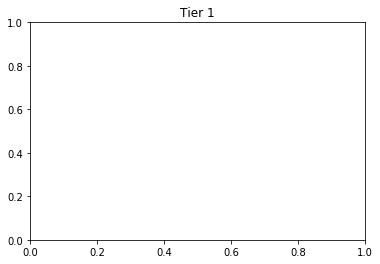

In [146]:
#Visualization
import matplotlib.pyplot as plt
plt.title('Tier 1')
plt.plot(indexes,t1_act,color='red')
plt.plot(indexes,t1_pred,color='blue')
plt.ylabel('Score')
plt.show()

plt.title('Tier 2')
plt.plot(indexes,t2_act,color='red')
plt.plot(indexes,t2_pred,color='blue')
plt.ylabel('Score')
plt.show()

plt.title('Tier 3')
plt.plot(indexes,t3_act,color='red')
plt.plot(indexes,t3_pred,color='blue')
plt.ylabel('Score')
plt.show()

In [145]:
#This part is probably still very broken
#Visualize regularized
Y_reg = df.iloc[65:,59]
indexes = [0]*len(X)
y_pred_normalized = [0]*len(X)
for i in range(len(X)):
    res = (ynew[i]*t1_std)+t1_mean
    print("Actual=%s, Predicted=%s" % (Y_reg[i+65], res))
    indexes[i] = i
    y_pred_normalized[i] = res

Actual=149580, Predicted=[445593.25 352845.1  420298.94]
Actual=362962, Predicted=[548895.9  436865.06 503594.4 ]
Actual=394587, Predicted=[739843.9  592170.44 657560.5 ]
Actual=102704, Predicted=[290220.6  226474.53 295018.2 ]
Actual=394538, Predicted=[716212.44 572950.1  638505.94]
Actual=166854, Predicted=[350953.66 275871.03 343988.72]
Actual=206680, Predicted=[459532.78 364182.66 431538.75]
Actual=193671, Predicted=[473097.3 375215.2 442476.2]
Actual=145371, Predicted=[311531.56 243807.56 312201.75]
Actual=276096, Predicted=[590015.8  470309.5  536750.44]
Actual=290383, Predicted=[376551.3  296690.62 364628.75]
Actual=343241, Predicted=[611285.75 487609.16 553900.94]
Actual=249112, Predicted=[512100.88 406938.3  473925.72]
Actual=814482, Predicted=[642657.25 513124.8  579196.5 ]
Actual=139831, Predicted=[213918.28 164414.9  233493.69]
Actual=348456, Predicted=[531359.   422601.7  489454.06]
Actual=198303, Predicted=[447926.88 354743.12 422180.62]
Actual=202090, Predicted=[355891.9

IndexError: index 25 is out of bounds for axis 0 with size 25

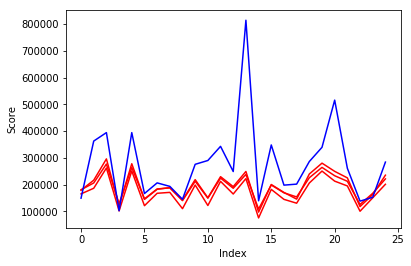

In [52]:
#Visualization
import matplotlib.pyplot as plt
plt.plot(indexes, y_pred_normalized,color='red')
plt.plot(indexes,Y_reg,color='blue')
plt.ylabel('Score')
plt.xlabel('Index')
plt.show()

In [ ]:
df.head()